In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv('/kaggle/input/covid-19-location-and-affect/covid_19_clean_complete.csv')
data

Province/State         Country/Region        Lat       Long        Date  \
0                NaN            Afghanistan  33.939110  67.709953  2020-01-22   
1                NaN                Albania  41.153300  20.168300  2020-01-22   
2                NaN                Algeria  28.033900   1.659600  2020-01-22   
3                NaN                Andorra  42.506300   1.521800  2020-01-22   
4                NaN                 Angola -11.202700  17.873900  2020-01-22   
...              ...                    ...        ...        ...         ...   
49063            NaN  Sao Tome and Principe   0.186400   6.613100  2020-07-27   
49064            NaN                  Yemen  15.552727  48.516388  2020-07-27   
49065            NaN                Comoros -11.645500  43.333300  2020-07-27   
49066            NaN             Tajikistan  38.861000  71.276100  2020-07-27   
49067            NaN                Lesotho -29.610000  28.233600  2020-07-27   

       Confirmed  Deaths  Recovered  Active             WHO Region  
0              0       0          0       0  Eastern Mediterranean  
1              0       0          0       0                 Europe  
2              0       0          0       0                 Africa  
3              0       0          0       0                 Europe  
4              0       0          0       0                 Africa  
...          ...     ...        ...     ...                    ...  
49063        865      14        734     117                 Africa  
49064       1691     483        833     375  Eastern Mediterranean  
49065        354       7        328      19                 Africa  
49066       7235      60       6028    1147                 Europe  
49067        505      12        128     365                 Africa  

[49068 rows x 10 columns]

# Analysis

In [4]:
data.shape

(49068, 10)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49068 entries, 0 to 49067
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Province/State  14664 non-null  object 
 1   Country/Region  49068 non-null  object 
 2   Lat             49068 non-null  float64
 3   Long            49068 non-null  float64
 4   Date            49068 non-null  object 
 5   Confirmed       49068 non-null  int64  
 6   Deaths          49068 non-null  int64  
 7   Recovered       49068 non-null  int64  
 8   Active          49068 non-null  int64  
 9   WHO Region      49068 non-null  object 
dtypes: float64(2), int64(4), object(4)
memory usage: 3.7+ MB


In [6]:
data['Date'] = pd.to_datetime(data['Date'])

In [7]:
data.head()

Province/State Country/Region       Lat       Long       Date  Confirmed  \
0            NaN    Afghanistan  33.93911  67.709953 2020-01-22          0   
1            NaN        Albania  41.15330  20.168300 2020-01-22          0   
2            NaN        Algeria  28.03390   1.659600 2020-01-22          0   
3            NaN        Andorra  42.50630   1.521800 2020-01-22          0   
4            NaN         Angola -11.20270  17.873900 2020-01-22          0   

   Deaths  Recovered  Active             WHO Region  
0       0          0       0  Eastern Mediterranean  
1       0          0       0                 Europe  
2       0          0       0                 Africa  
3       0          0       0                 Europe  
4       0          0       0                 Africa

In [8]:
data.describe()

Lat          Long                 Date     Confirmed  \
count  49068.000000  49068.000000                49068  4.906800e+04   
mean      21.433730     23.528236  2020-04-24 12:00:00  1.688490e+04   
min      -51.796300   -135.000000  2020-01-22 00:00:00  0.000000e+00   
25%        7.873054    -15.310100  2020-03-08 18:00:00  4.000000e+00   
50%       23.634500     21.745300  2020-04-24 12:00:00  1.680000e+02   
75%       41.204380     80.771797  2020-06-10 06:00:00  1.518250e+03   
max       71.706900    178.065000  2020-07-27 00:00:00  4.290259e+06   
std       24.950320     70.442740                  NaN  1.273002e+05   

              Deaths     Recovered        Active  
count   49068.000000  4.906800e+04  4.906800e+04  
mean      884.179160  7.915713e+03  8.085012e+03  
min         0.000000  0.000000e+00 -1.400000e+01  
25%         0.000000  0.000000e+00  0.000000e+00  
50%         2.000000  2.900000e+01  2.600000e+01  
75%        30.000000  6.660000e+02  6.060000e+02  
max    148011.000000  1.846641e+06  2.816444e+06  
std      6313.584411  5.480092e+04  7.625890e+04

In [9]:
data.columns

Index(['Province/State', 'Country/Region', 'Lat', 'Long', 'Date', 'Confirmed',
       'Deaths', 'Recovered', 'Active', 'WHO Region'],
      dtype='object')

In [10]:
data.rename(columns = {
    'Province/State' : 'State',
    'Country/Region' : 'Country'}, inplace = True)

In [11]:
data.isnull().sum()

State         34404
Country           0
Lat               0
Long              0
Date              0
Confirmed         0
Deaths            0
Recovered         0
Active            0
WHO Region        0
dtype: int64

In [12]:
data[data['State'].isnull()==False]

State         Country      Lat      Long  \
8      Australian Capital Territory       Australia -35.4735  149.0124   
9                   New South Wales       Australia -33.8688  151.2093   
10               Northern Territory       Australia -12.4634  130.8456   
11                       Queensland       Australia -27.4698  153.0251   
12                  South Australia       Australia -34.9285  138.6007   
...                             ...             ...      ...       ...   
49052                      Anguilla  United Kingdom  18.2206  -63.0686   
49053        British Virgin Islands  United Kingdom  18.4207  -64.6400   
49054      Turks and Caicos Islands  United Kingdom  21.6940  -71.7979   
49059   Falkland Islands (Malvinas)  United Kingdom -51.7963  -59.5236   
49060     Saint Pierre and Miquelon          France  46.8852  -56.3159   

            Date  Confirmed  Deaths  Recovered  Active       WHO Region  
8     2020-01-22          0       0          0       0  Western Pacific  
9     2020-01-22          0       0          0       0  Western Pacific  
10    2020-01-22          0       0          0       0  Western Pacific  
11    2020-01-22          0       0          0       0  Western Pacific  
12    2020-01-22          0       0          0       0  Western Pacific  
...          ...        ...     ...        ...     ...              ...  
49052 2020-07-27          3       0          3       0           Europe  
49053 2020-07-27          8       1          7       0           Europe  
49054 2020-07-27         99       2         36      61           Europe  
49059 2020-07-27         13       0         13       0           Europe  
49060 2020-07-27          4       0          1       3           Europe  

[14664 rows x 10 columns]

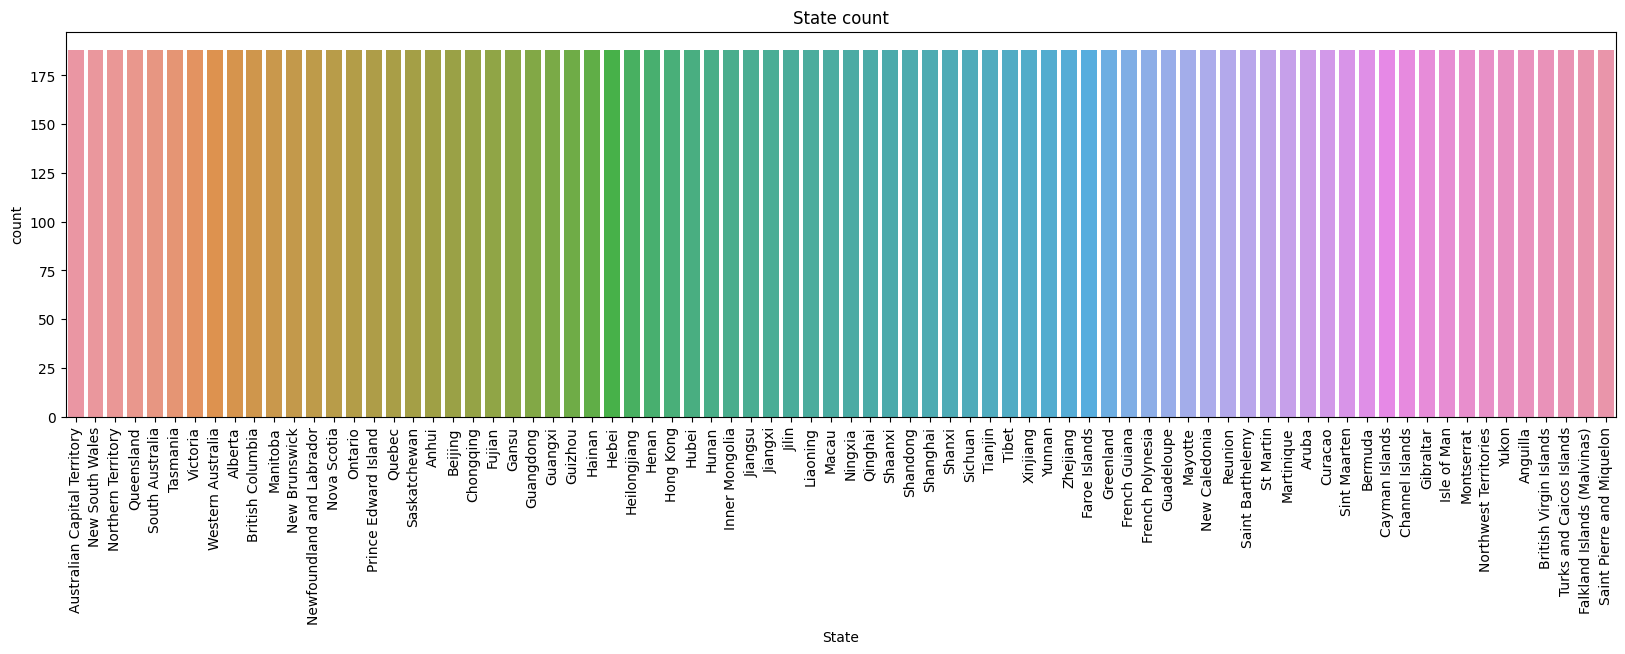

In [14]:
plt.figure(figsize = (20,5))
sns.countplot(data= data, x = 'State')
plt.xticks(rotation = 90)
plt.title('State count')
plt.show()

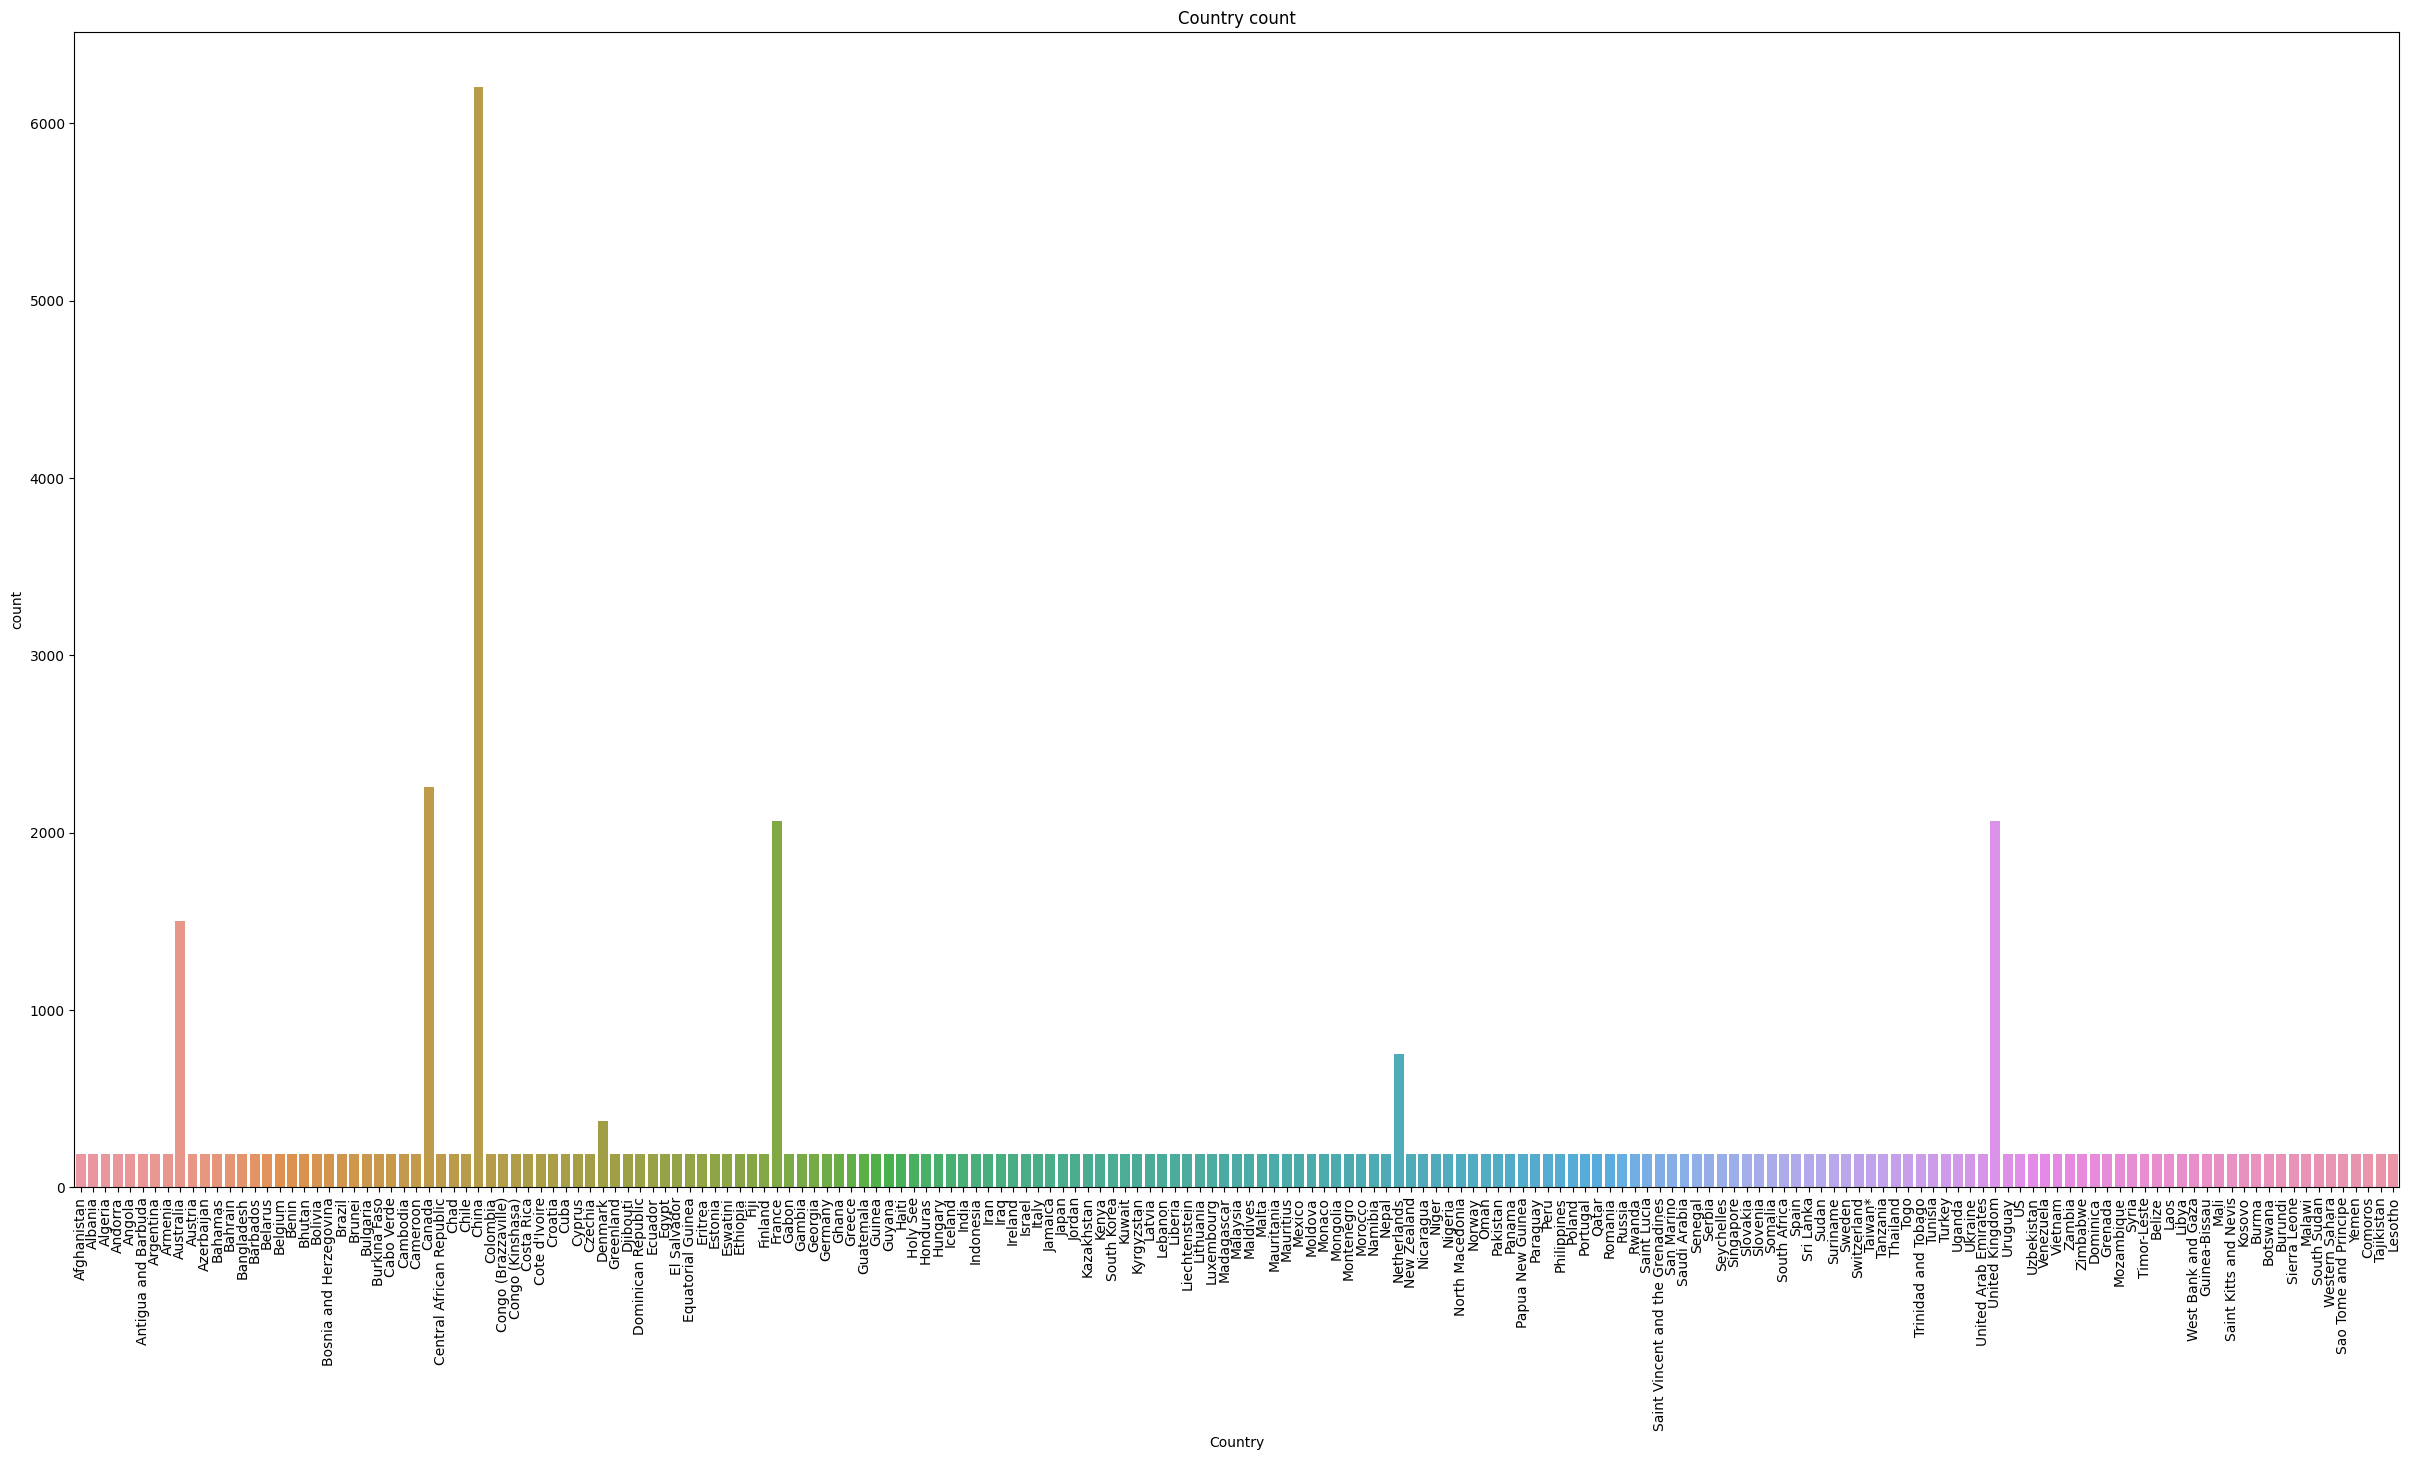

In [15]:
plt.figure(figsize = (30,15))
sns.countplot(data= data, x = 'Country')
plt.xticks(rotation = 90)
plt.title('Country count')
plt.show()

In [16]:
country_stats = data.groupby('Country').agg({
    'Confirmed': 'sum',
    'Deaths': 'sum',
    'Recovered': 'sum',
    'Active': 'sum'})
country_stats.reset_index(inplace=True)
country_stats.head()

Country  Confirmed  Deaths  Recovered   Active
0  Afghanistan    1936390   49098     798240  1089052
1      Albania     196702    5708     118877    72117
2      Algeria    1179755   77972     755897   345886
3      Andorra      94404    5423      69074    19907
4       Angola      22662    1078       6573    15011

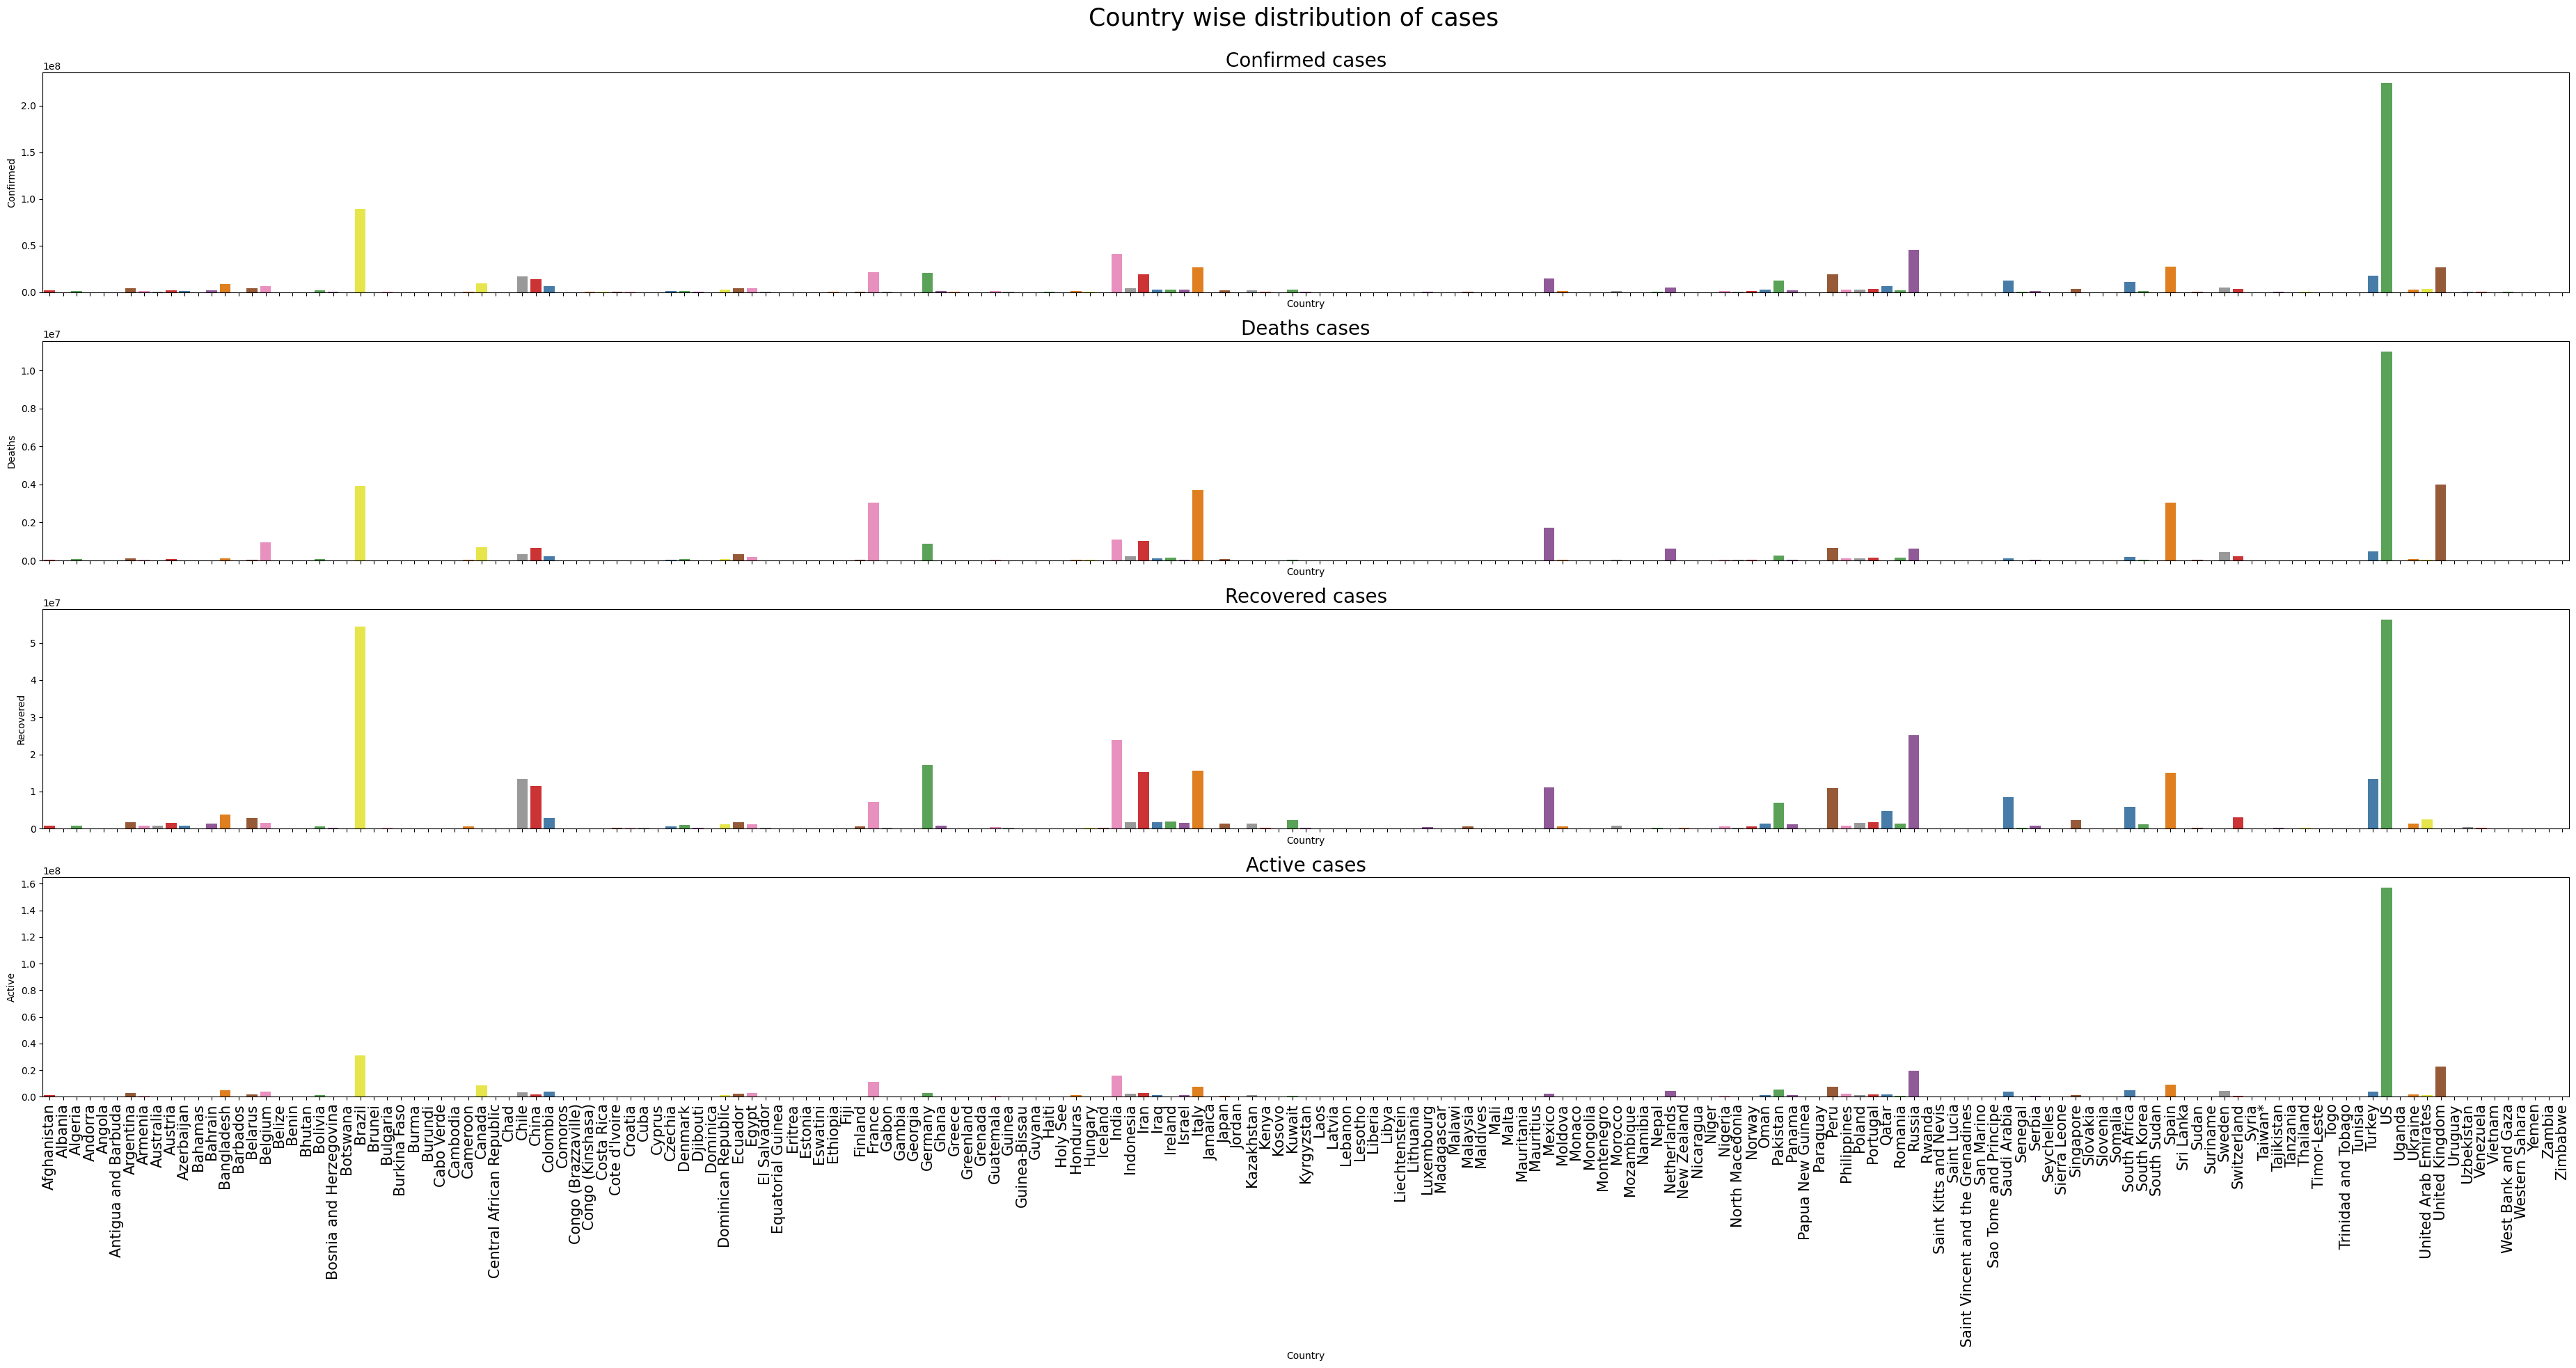

In [17]:
fig, axes = plt.subplots(4,1, figsize = (37,20), sharex = True)
for i in range(1,5):
    sns.barplot(x = country_stats['Country'], y = country_stats[country_stats.columns[i]], palette = sns.color_palette("Set1"), ax = axes[i-1])
    axes[i-1].set_xticklabels(axes[i-1].get_xticklabels(), rotation=90, fontsize = 15)
    axes[i-1].set_title(f'{country_stats.columns[i]} cases', fontsize = 20)

fig.suptitle('Country wise distribution of cases', fontsize = 25)
plt.subplots_adjust(hspace=5)
plt.tight_layout(rect=[0, 0, 1, 0.98])
plt.show()
    

##### US has the highest number of Confirmed, Active, Recovered and Death cases.


In [18]:
#last recorded date
data['Date'].max()

Timestamp('2020-07-27 00:00:00')

In [19]:
# Number of days in data
data['Date'].max() - data['Date'].min()

Timedelta('187 days 00:00:00')

In [20]:
#Incidents on the last recorded day
last = data[data['Date']==data['Date'].max()]
last.head()

State      Country       Lat       Long       Date  Confirmed  Deaths  \
48807   NaN  Afghanistan  33.93911  67.709953 2020-07-27      36263    1269   
48808   NaN      Albania  41.15330  20.168300 2020-07-27       4880     144   
48809   NaN      Algeria  28.03390   1.659600 2020-07-27      27973    1163   
48810   NaN      Andorra  42.50630   1.521800 2020-07-27        907      52   
48811   NaN       Angola -11.20270  17.873900 2020-07-27        950      41   

       Recovered  Active             WHO Region  
48807      25198    9796  Eastern Mediterranean  
48808       2745    1991                 Europe  
48809      18837    7973                 Africa  
48810        803      52                 Europe  
48811        242     667                 Africa

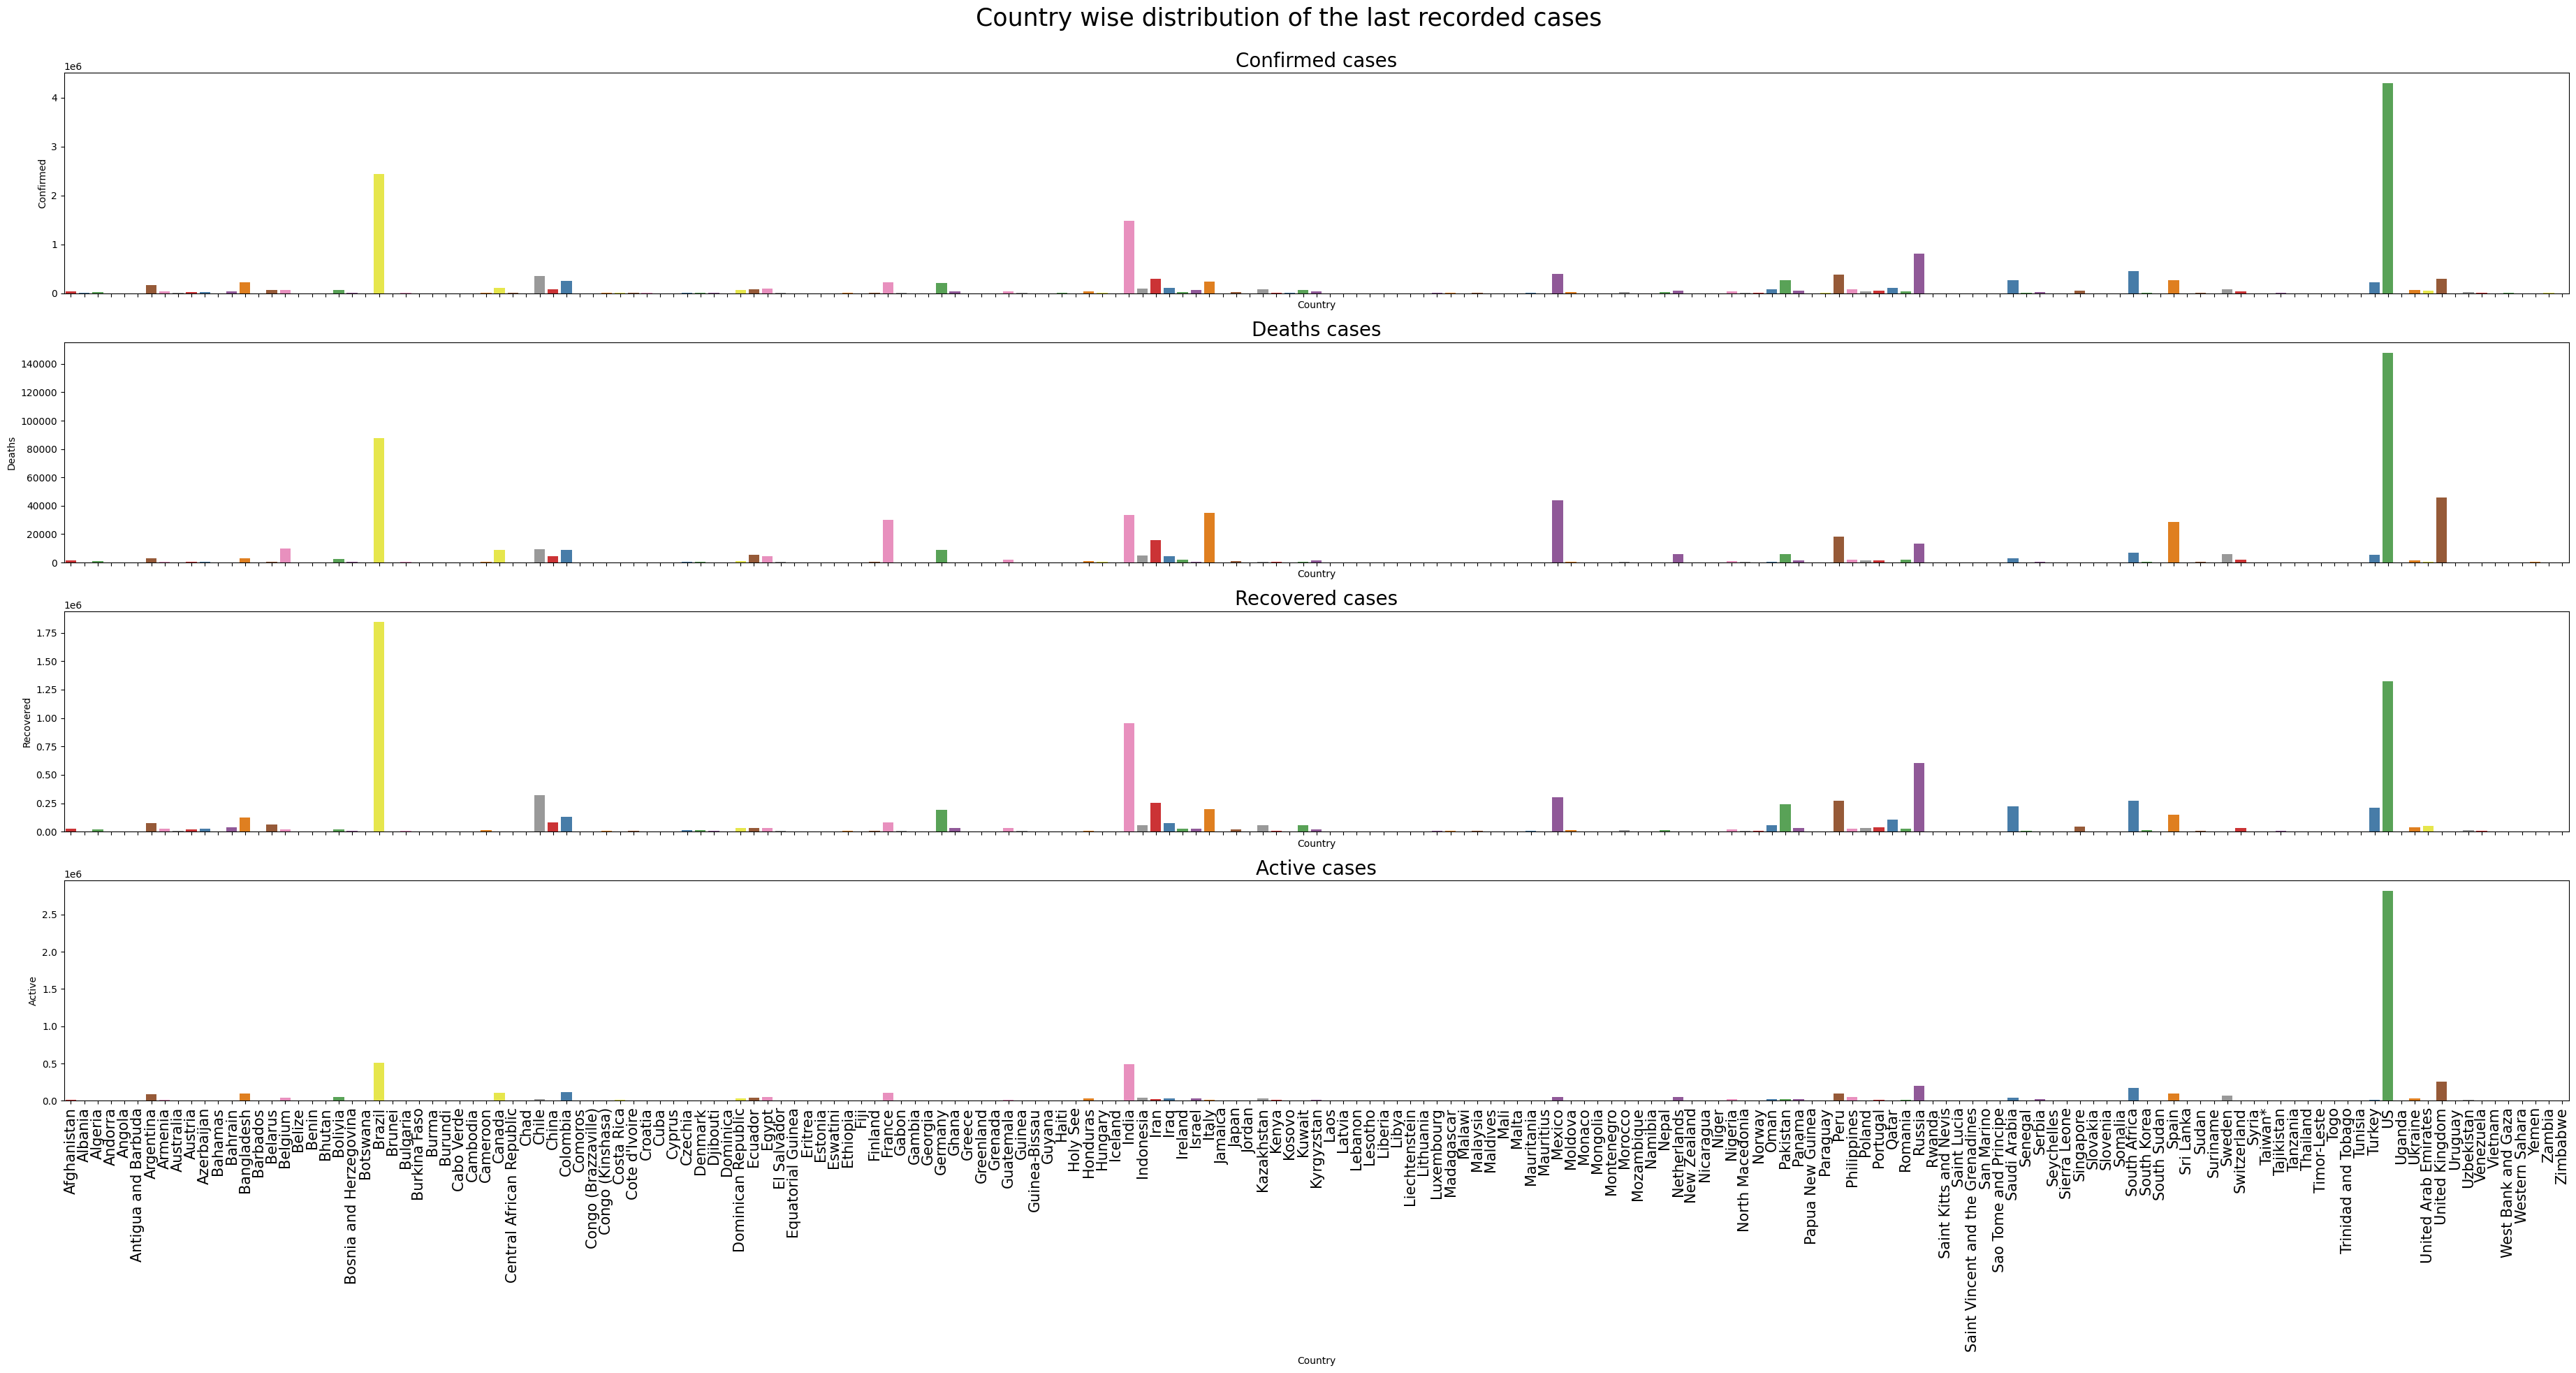

In [21]:
#Country wise distribution on last recorded day
last_count = last.groupby('Country')[['Confirmed','Deaths','Recovered','Active']].sum().reset_index()
fig, axes = plt.subplots(4,1, figsize = (37,20), sharex = True)
for i in range(1,5):
    sns.barplot(x = last_count['Country'], y = last_count[last_count.columns[i]], palette = sns.color_palette("Set1"), ax = axes[i-1])
    axes[i-1].set_xticklabels(axes[i-1].get_xticklabels(), rotation=90, fontsize = 15)
    axes[i-1].set_title(f'{last_count.columns[i]} cases', fontsize = 20)

fig.suptitle('Country wise distribution of the last recorded cases', fontsize = 25)
plt.subplots_adjust(hspace=5)
plt.tight_layout(rect=[0, 0, 1, 0.98])
plt.show()

In [22]:
# Top 20 countries with highest active cases on last recorded date
last_count[['Country','Active']].sort_values(by = 'Active', ascending=False).head(20)

Country   Active
173              US  2816444
23           Brazil   508116
79            India   495499
177  United Kingdom   254427
138          Russia   201097
154    South Africa   170537
37         Colombia   117163
61           France   108928
32           Canada   107514
132            Peru    98752
13       Bangladesh    97577
157           Spain    93613
6         Argentina    91782
161          Sweden    73695
133     Philippines    53649
52            Egypt    52992
111          Mexico    47657
120     Netherlands    47064
20          Bolivia    47056
145    Saudi Arabia    43238

In [23]:
fig = px.choropleth (last_count,
                     locations = 'Country',
                     locationmode = 'country names',
                     hover_name= 'Country' ,
                     color = 'Active',
                     title = 'Last recorded Active cases in World',
                     range_color = [1000,2000000],
                     color_continuous_scale = 'speed')
fig.show()

In [24]:
# Top 20 countries with highest deaths on last recorded date
last_count[['Country','Deaths']].sort_values(by = 'Deaths', ascending=False).head(20)

Country  Deaths
173              US  148011
23           Brazil   87618
177  United Kingdom   45844
111          Mexico   44022
85            Italy   35112
79            India   33408
61           France   30212
157           Spain   28432
132            Peru   18418
81             Iran   15912
138          Russia   13334
16          Belgium    9822
35            Chile    9187
65          Germany    9125
32           Canada    8944
37         Colombia    8777
154    South Africa    7067
120     Netherlands    6160
128        Pakistan    5842
161          Sweden    5700

In [25]:
fig = px.choropleth (last_count,
                     locations = 'Country',
                     locationmode = 'country names',
                     hover_name= 'Country' ,
                     color = 'Deaths',
                     title = 'Last recorded Death toll in World',
                     range_color = [100,150000],
                     color_continuous_scale = 'inferno_r')
fig.show()

In [31]:
#Overall maximum deaths recorded in a country
country_stats[['Country', 'Deaths']][country_stats['Deaths'] == country_stats['Deaths'].max()]

Country    Deaths
173      US  11011411

In [27]:
fig = px.choropleth (country_stats,
                     locations = 'Country',
                     locationmode = 'country names',
                     hover_name= 'Country' ,
                     color = 'Deaths',
                     title = 'Overall Death toll in World',
                     range_color = [1000,12000000],
                     color_continuous_scale = 'inferno_r')
fig.show()

In [39]:
#Maximum death recorded in a particular date
data[['Country', 'Date', 'Deaths']][data['Deaths']==data['Deaths'].max()]

Country       Date  Deaths
32711      US 2020-07-27  148011

In [26]:
fig = px.choropleth (data,
                     locations = 'Country',
                     locationmode = 'country names',
                     hover_name= 'Country' ,
                     color = 'Deaths',
                     title = 'Day wise Death toll in World',
                     range_color = [1,150000],
                     color_continuous_scale = 'inferno_r',
                     animation_frame='Date')
fig.show()

/opt/conda/lib/python3.10/site-packages/plotly/express/_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



In [32]:
#Overall maximum confirm cases recorded by a country
country_stats[['Country', 'Confirmed']][country_stats['Confirmed'] == country_stats['Confirmed'].max()]

Country  Confirmed
173      US  224345948

In [29]:
fig = px.choropleth (country_stats,
                     locations = 'Country',
                     locationmode = 'country names',
                     hover_name= 'Country' ,
                     color = 'Confirmed',
                     title = 'Overall confirmed cases in World',
                     range_color = [1,230000000],
                     color_continuous_scale = 'orrd')
fig.show()

In [42]:
#Maximum confirmed cases recorded in a particular date
data[['Country', 'Date', 'Confirmed']][data['Confirmed']==data['Confirmed'].max()]

Country       Date  Confirmed
49030      US 2020-07-27    4290259

In [31]:
fig = px.choropleth (data,
                     locations = 'Country',
                     locationmode = 'country names',
                     hover_name= 'Country' ,
                     color = 'Confirmed',
                     title = 'Day wise confirmed cases in World',
                     range_color = [1,4500000],
                     color_continuous_scale = 'orrd',
                     animation_frame='Date')
fig.show()

/opt/conda/lib/python3.10/site-packages/plotly/express/_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



In [43]:
#Overall maximum recovered cases recorded by a country
country_stats[['Country', 'Recovered']][country_stats['Recovered'] == country_stats['Recovered'].max()]

Country  Recovered
173      US   56353416

In [44]:
fig = px.choropleth (country_stats,
                     locations = 'Country',
                     locationmode = 'country names',
                     hover_name= 'Country' ,
                     color = 'Recovered',
                     title = 'Overall recovered cases in World',
                     range_color = [1,57000000],
                     color_continuous_scale = 'greens')
fig.show()

In [45]:
#Maximum recovered cases recorded in a particular date
data[['Country', 'Date', 'Recovered']][data['Recovered']==data['Recovered'].max()]

Country       Date  Recovered
48835  Brazil 2020-07-27    1846641

In [48]:
fig = px.choropleth (data,
                     locations = 'Country',
                     locationmode = 'country names',
                     hover_name= 'Country' ,
                     color = 'Recovered',
                     title = 'Day wise recovered cases in World',
                     range_color = [1,1900000],
                     color_continuous_scale = 'greens',
                     animation_frame='Date')
fig.show()

## Correlation analysis

In [50]:
from scipy.stats import pearsonr

In [51]:
Corr_data =data.groupby('Date').agg({
    'Confirmed': 'sum',
    'Deaths': 'sum',
    'Recovered': 'sum',
    'Active': 'sum'})
Corr_data.head()

Confirmed  Deaths  Recovered  Active
Date                                            
2020-01-22        555      17         28     510
2020-01-23        654      18         30     606
2020-01-24        941      26         36     879
2020-01-25       1434      42         39    1353
2020-01-26       2118      56         52    2010

In [52]:
corr = Corr_data.corr(method = 'pearson')
corr

Confirmed    Deaths  Recovered    Active
Confirmed   1.000000  0.975981   0.990165  0.986543
Deaths      0.975981  1.000000   0.936940  0.996879
Recovered   0.990165  0.936940   1.000000  0.953981
Active      0.986543  0.996879   0.953981  1.000000

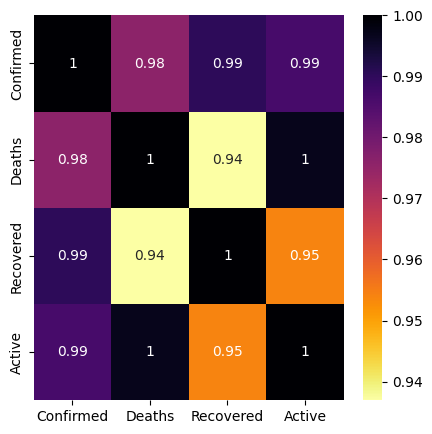

In [53]:
plt.figure(figsize=(5,5))
sns.heatmap(corr, annot = True, cmap = 'inferno_r')
plt.show()

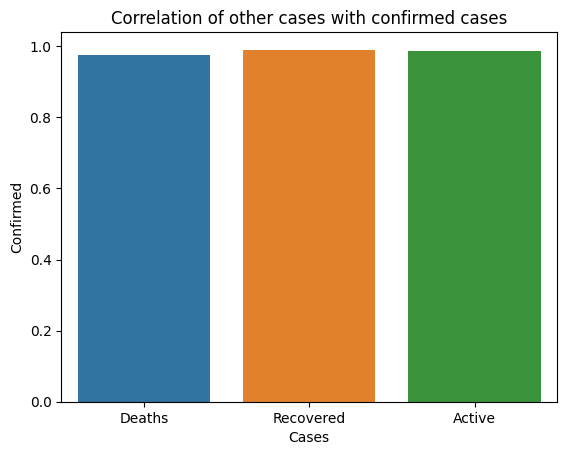

In [54]:
sns.barplot(x = corr.reset_index()['index'][1:], y = corr.reset_index()['Confirmed'][1:])
plt.xlabel('Cases')
plt.title('Correlation of other cases with confirmed cases')
plt.show()

### The increase in confirmed cases seems to have a positive impact on increase in other cases (positively correlated). However, the impact on the number of recovered cases(0.99) is slightly more than the death cases (0.97).

## Recovered to Death ratio

In [55]:
#creating dataset for recovered to death ratio
recovered_death_ratio = data.groupby('Date')[['Recovered','Deaths']].sum().reset_index()
recovered_death_ratio['R/D ratio'] = recovered_death_ratio['Recovered']/recovered_death_ratio['Deaths']
recovered_death_ratio.drop(['Recovered','Deaths'],axis=1,inplace=True)
recovered_death_ratio

Date  R/D ratio
0   2020-01-22   1.647059
1   2020-01-23   1.666667
2   2020-01-24   1.384615
3   2020-01-25   0.928571
4   2020-01-26   0.928571
..         ...        ...
183 2020-07-23  13.750413
184 2020-07-24  13.975932
185 2020-07-25  14.210243
186 2020-07-26  14.328034
187 2020-07-27  14.476400

[188 rows x 2 columns]

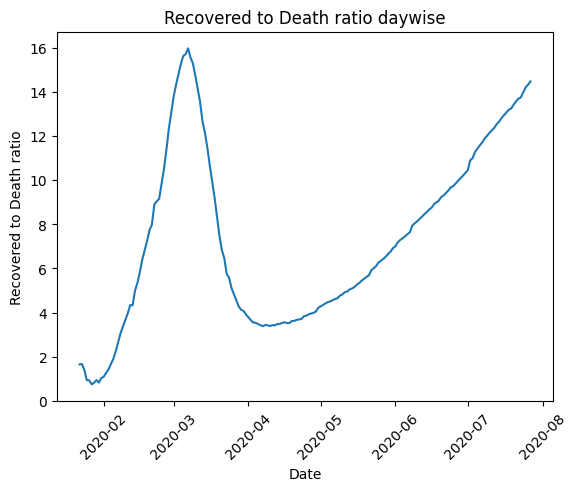

In [56]:
sns.lineplot(x = recovered_death_ratio['Date'], y = recovered_death_ratio['R/D ratio'])
plt.xlabel('Date')
plt.ylabel('Recovered to Death ratio')
plt.xticks(rotation = 45)
plt.title('Recovered to Death ratio daywise')
plt.show()

# Trend analysis

In [57]:
daywise = Corr_data.reset_index()
daywise.head()

Date  Confirmed  Deaths  Recovered  Active
0 2020-01-22        555      17         28     510
1 2020-01-23        654      18         30     606
2 2020-01-24        941      26         36     879
3 2020-01-25       1434      42         39    1353
4 2020-01-26       2118      56         52    2010

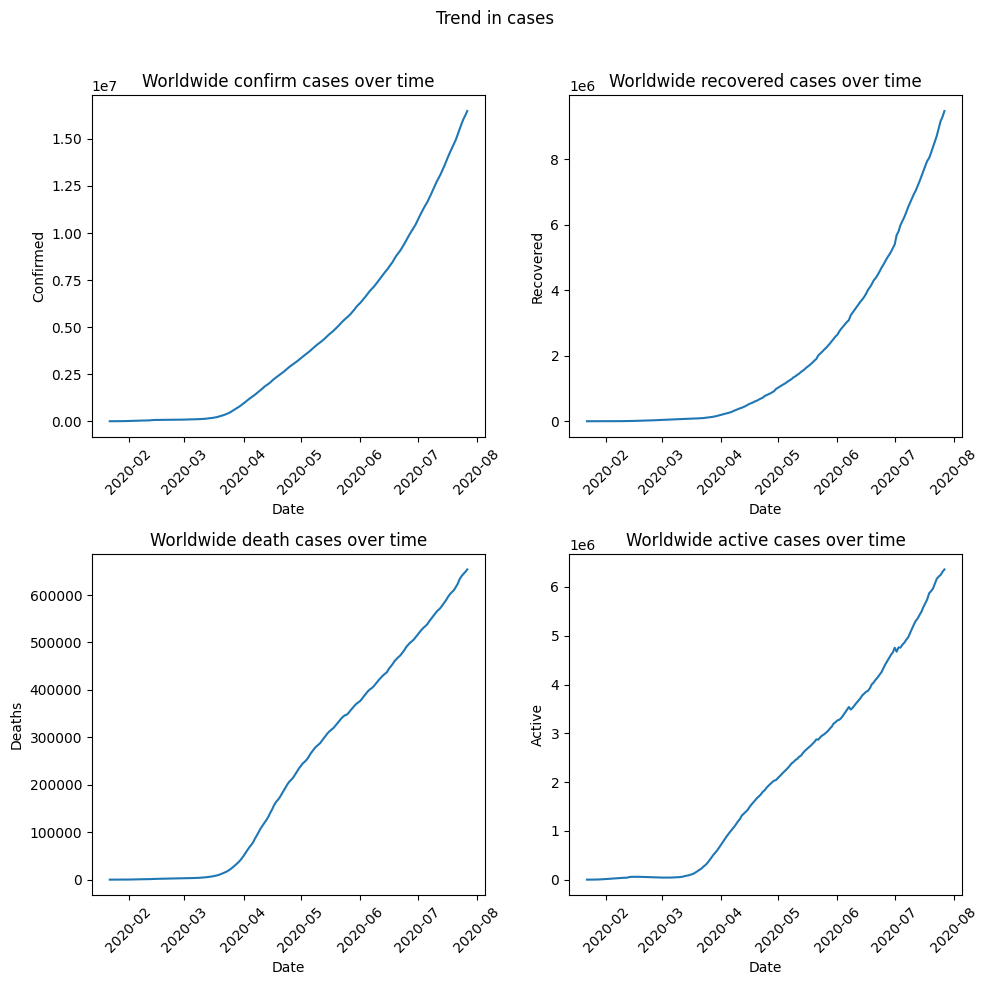

In [60]:
fig, ax = plt.subplots(nrows = 2, ncols = 2, figsize = (10,10))

sns.lineplot(x = daywise['Date'],y = daywise['Confirmed'], ax = ax[0,0])
ax[0,0].set_title('Worldwide confirm cases over time')
ax[0,0].set_xticklabels(ax[0,0].get_xticklabels(), rotation=45)

sns.lineplot(x = daywise['Date'],y = daywise['Recovered'], ax = ax[0,1])
ax[0,1].set_title('Worldwide recovered cases over time')
ax[0,1].set_xticklabels(ax[0,1].get_xticklabels(), rotation=45)

sns.lineplot(x = daywise['Date'],y = daywise['Deaths'], ax = ax[1,0])
ax[1,0].set_title('Worldwide death cases over time')
ax[1,0].set_xticklabels(ax[1,0].get_xticklabels(), rotation=45)

sns.lineplot(x = daywise['Date'],y = daywise['Active'], ax = ax[1,1])
ax[1,1].set_title('Worldwide active cases over time')
ax[1,1].set_xticklabels(ax[1,1].get_xticklabels(), rotation=45)

plt.suptitle('Trend in cases')
plt.subplots_adjust(hspace=5)
plt.tight_layout(rect=[0, 0, 1, 0.98])
plt.show()

### The confirmed, active and death cases are showing an upward trend indicating the widespread of covd-19 but on other hand the increasing trend in recovery cases indicates a positive atmosphere.

# Time series fitting and forecasting

In [61]:
#FBProphet (Forecast model)
!pip install prophet

In [62]:
from prophet import Prophet
from sklearn.metrics import mean_squared_error

In [63]:
#Date wise confirmed, recovered and death cases
confirmed = data.groupby('Date')['Confirmed'].agg('sum').reset_index()
recovered = data.groupby('Date')['Recovered'].agg('sum').reset_index()
death = data.groupby('Date')['Deaths'].agg('sum').reset_index()

In [64]:
confirmed.shape

(188, 2)

In [65]:
recovered.shape

(188, 2)

In [66]:
death.shape

(188, 2)

### Model creation and fitting

In [72]:
def train_test(df, split):
    '''test-train split'''    
    train = df.iloc[:split]
    test = df.iloc[split:]
    return train,test

def series_fit(df, train, test):
    'For Prophet'
    'Formating train data for Prophet input'
    train_p = train.copy()
    train_p.columns = ['ds','y']
    train_p['ds'] = pd.to_datetime(train_p['ds'])

    'Formating test data for Prophet input'
    test_p = test.copy()
    test_p.columns = ['ds','y']
    test_p['ds'] = pd.to_datetime(test_p['ds'])

    model_prophet = Prophet(interval_width=0.95)
    model_prophet.fit(train_p)
    forecast_p = model_prophet.predict(test_p.drop('y',axis = 1))
    pred_prophet = forecast_p[['ds', 'yhat']].set_index('ds')
    print('Prophet model prediction generated')
    
    'For plotting'
    fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (10,10))
    prophet_plot = model_prophet.plot(forecast_p, include_legend = True, ax = ax)
    df.set_index('Date').plot(legend = True, ax = ax, title = 'Prophet model test prediction plot', color = 'green')
    plt.show()
    
    'RMSE score'
    rmse_Prophet = mean_squared_error(df.iloc[len(train):, 1], pred_prophet['yhat'], squared = False)
    print(f'RMSE value of Prophet --> {rmse_Prophet}')

#### For confirmed cases

In [73]:
train,test = train_test(confirmed,150)

00:03:22 - cmdstanpy - INFO - Chain [1] start processing
00:03:22 - cmdstanpy - INFO - Chain [1] done processing


Prophet model prediction generated


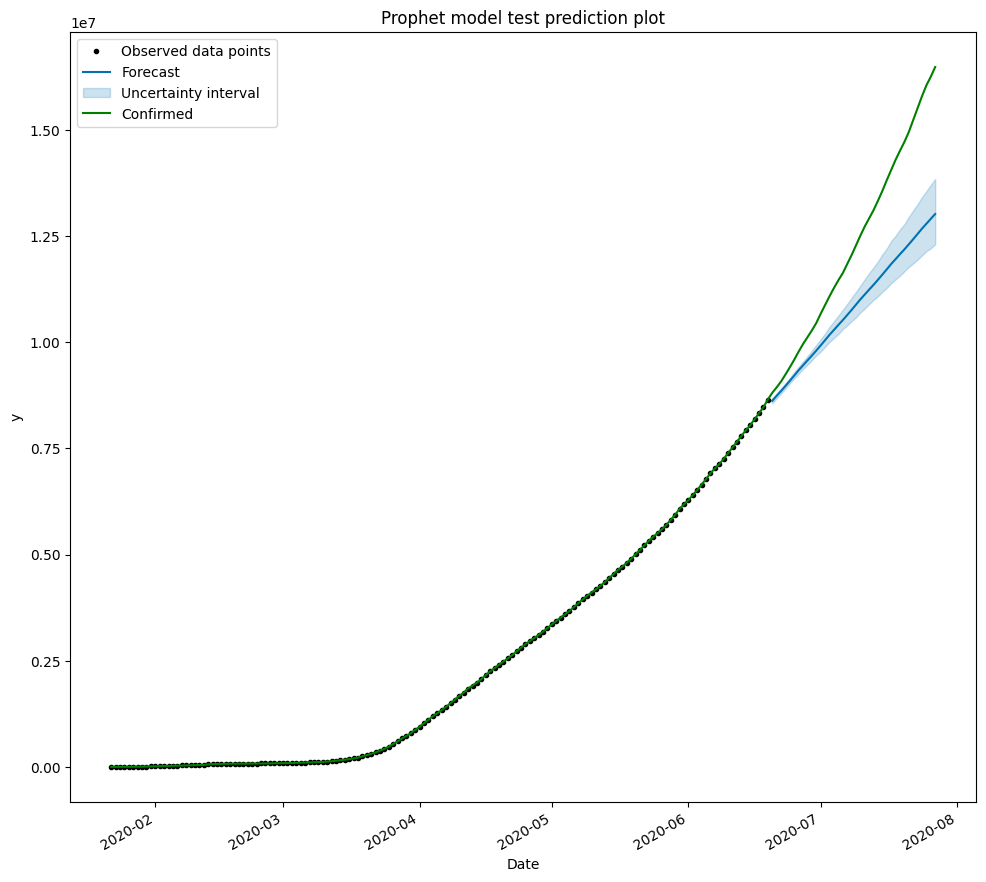

RMSE value of Prophet --> 1810782.5697024853


In [74]:
series_fit(confirmed, train, test)

In [75]:
#creating model for confirm cases
model_confirmcase = Prophet(interval_width=0.95)

In [76]:
#fitting the model for confirmed cases
confirmed.columns = ['ds','y']
model_confirmcase.fit(confirmed)

00:03:27 - cmdstanpy - INFO - Chain [1] start processing
00:03:27 - cmdstanpy - INFO - Chain [1] done processing


##### Creating future dates for forecasting

In [77]:
#creating future dates for prediction of next 180 days
future = model_confirmcase.make_future_dataframe(periods=180,freq='D')
future

ds
0   2020-01-22
1   2020-01-23
2   2020-01-24
3   2020-01-25
4   2020-01-26
..         ...
363 2021-01-19
364 2021-01-20
365 2021-01-21
366 2021-01-22
367 2021-01-23

[368 rows x 1 columns]

In [78]:
forecast_confirmcase = model_confirmcase.predict(future)
#Converting to integer type for plotting
forecast_confirmcase[['yhat','yhat_lower','yhat_upper']] = forecast_confirmcase[['yhat','yhat_lower','yhat_upper']].astype(int)
forecast_confirmcase

ds         trend  yhat_lower  yhat_upper   trend_lower  \
0   2020-01-22 -9.777905e+03     -189358      141291 -9.777905e+03   
1   2020-01-23 -7.055743e+03     -165688      145698 -7.055743e+03   
2   2020-01-24 -4.333581e+03     -147520      172004 -4.333581e+03   
3   2020-01-25 -1.611419e+03     -150842      175431 -1.611419e+03   
4   2020-01-26  1.110743e+03     -164643      163284  1.110743e+03   
..         ...           ...         ...         ...           ...   
363 2021-01-19  5.204873e+07    39873914    64034803  3.989950e+07   
364 2021-01-20  5.225279e+07    40111543    64250273  4.000898e+07   
365 2021-01-21  5.245685e+07    40086203    64632967  4.014923e+07   
366 2021-01-22  5.266091e+07    40315016    64851890  4.029021e+07   
367 2021-01-23  5.286497e+07    40407378    65095762  4.041782e+07   

      trend_upper  additive_terms  additive_terms_lower  additive_terms_upper  \
0   -9.777905e+03   -10998.184272         -10998.184272         -10998.184272   
1   -7.055743e+03    -1105.731772          -1105.731772          -1105.731772   
2   -4.333581e+03    10049.827496          10049.827496          10049.827496   
3   -1.611419e+03    13740.639044          13740.639044          13740.639044   
4    1.110743e+03     7254.883671           7254.883671           7254.883671   
..            ...             ...                   ...                   ...   
363  6.403424e+07   -16795.653159         -16795.653159         -16795.653159   
364  6.431590e+07   -10998.184272         -10998.184272         -10998.184272   
365  6.459755e+07    -1105.731772          -1105.731772          -1105.731772   
366  6.487921e+07    10049.827496          10049.827496          10049.827496   
367  6.516086e+07    13740.639044          13740.639044          13740.639044   

           weekly  weekly_lower  weekly_upper  multiplicative_terms  \
0   -10998.184272 -10998.184272 -10998.184272                   0.0   
1    -1105.731772  -1105.731772  -1105.731772                   0.0   
2    10049.827496  10049.827496  10049.827496                   0.0   
3    13740.639044  13740.639044  13740.639044                   0.0   
4     7254.883671   7254.883671   7254.883671                   0.0   
..            ...           ...           ...                   ...   
363 -16795.653159 -16795.653159 -16795.653159                   0.0   
364 -10998.184272 -10998.184272 -10998.184272                   0.0   
365  -1105.731772  -1105.731772  -1105.731772                   0.0   
366  10049.827496  10049.827496  10049.827496                   0.0   
367  13740.639044  13740.639044  13740.639044                   0.0   

     multiplicative_terms_lower  multiplicative_terms_upper      yhat  
0                           0.0                         0.0    -20776  
1                           0.0                         0.0     -8161  
2                           0.0                         0.0      5716  
3                           0.0                         0.0     12129  
4                           0.0                         0.0      8365  
..                          ...                         ...       ...  
363                         0.0                         0.0  52031935  
364                         0.0                         0.0  52241792  
365                         0.0                         0.0  52455745  
366                         0.0                         0.0  52670960  
367                         0.0                         0.0  52878711  

[368 rows x 16 columns]

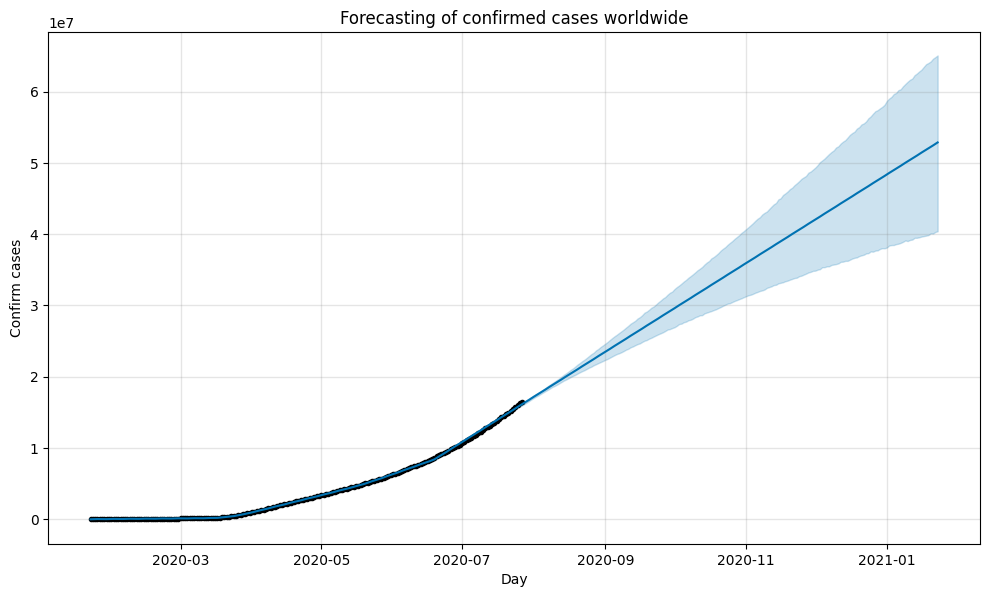

In [79]:
#ploting prediction for confirmed cases
confirm_plot = model_confirmcase.plot(forecast_confirmcase)
plt.xlabel("Day")
plt.ylabel('Confirm cases')
plt.title('Forecasting of confirmed cases worldwide')
plt.show()

##### There is a increase in confirm cases for the next 180 days

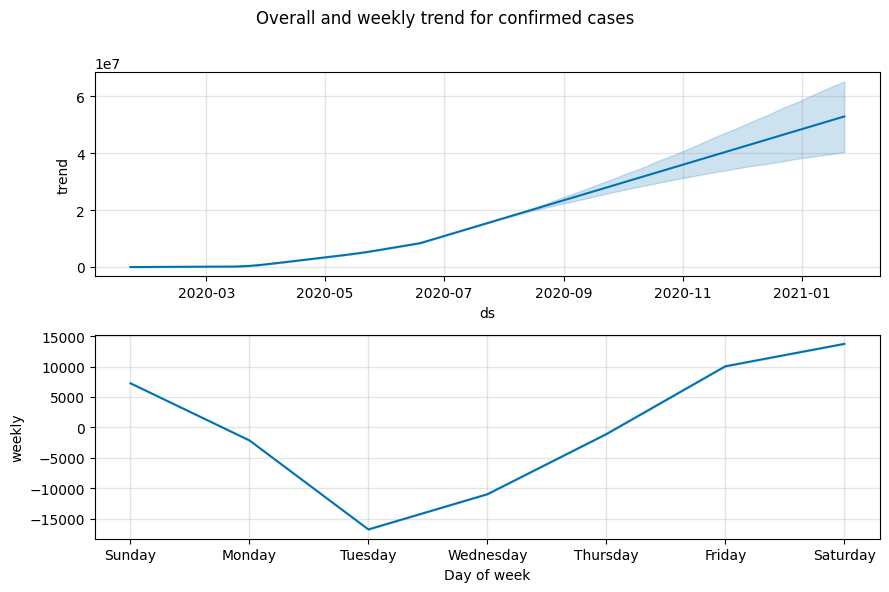

In [80]:
#ploting overall and weekly trends for confirmed cases
confirm_plot_components = model_confirmcase.plot_components(forecast_confirmcase)
plt.suptitle('Overall and weekly trend for confirmed cases')
plt.subplots_adjust(hspace=5)
plt.tight_layout(rect=[0, 0, 1, 0.98])
plt.show()

##### A weekly trend analysis shows a dip in numbers till tuesday and then an increase 

#### For active cases

In [82]:
train,test = train_test(recovered, 150)

00:03:48 - cmdstanpy - INFO - Chain [1] start processing
00:03:48 - cmdstanpy - INFO - Chain [1] done processing


Prophet model prediction generated


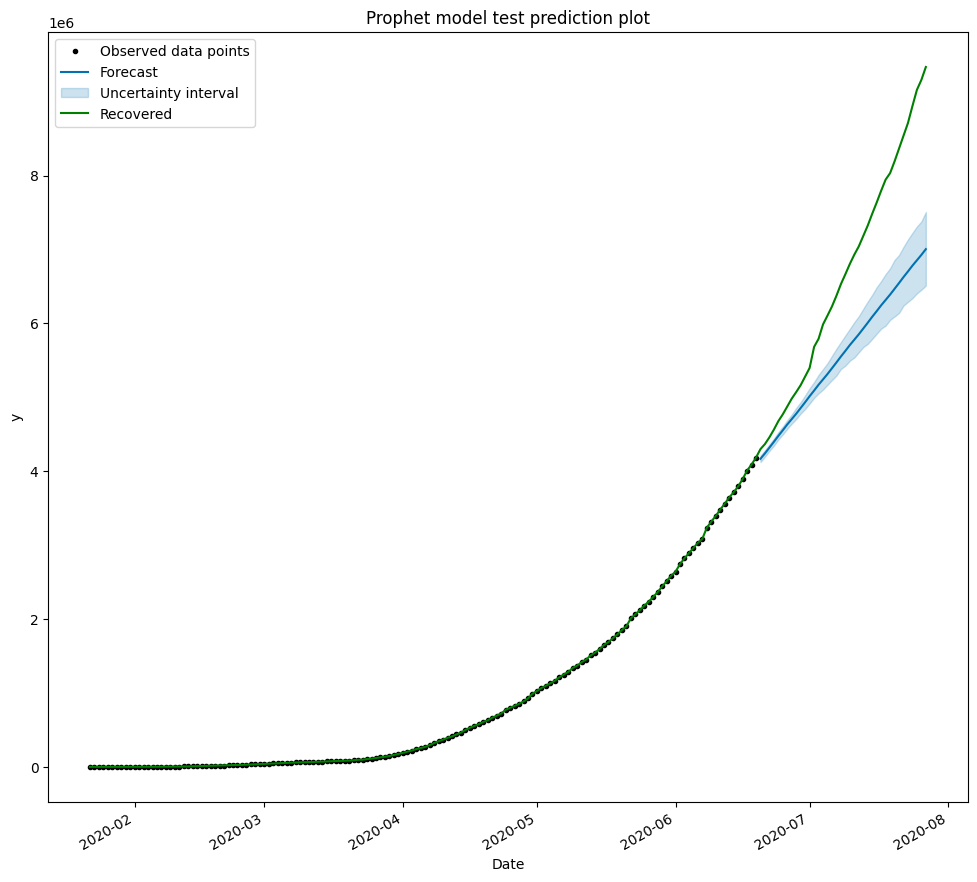

RMSE value of Prophet --> 1266426.4146993528


In [83]:
series_fit(recovered, train, test)

In [84]:
#creating model for recovered cases
model_recovercase = Prophet(interval_width = 0.95)

In [85]:
#fitting the model for recovered cases
recovered.columns = ['ds','y']
model_recovercase.fit(recovered)

00:03:57 - cmdstanpy - INFO - Chain [1] start processing
00:03:57 - cmdstanpy - INFO - Chain [1] done processing


In [86]:
#forecasting and ploting for recover cases for next 180 days
forecast_recovercase = model_recovercase.predict(future)
recover_plot = model_recovercase.plot(forecast_recovercase)
plt.xlabel("Day")
plt.ylabel('Recovered cases')
plt.title('Forecasting of recovered cases worldwide')
plt.show()

##### There is an increase in confirmed cases for the next 180 days.

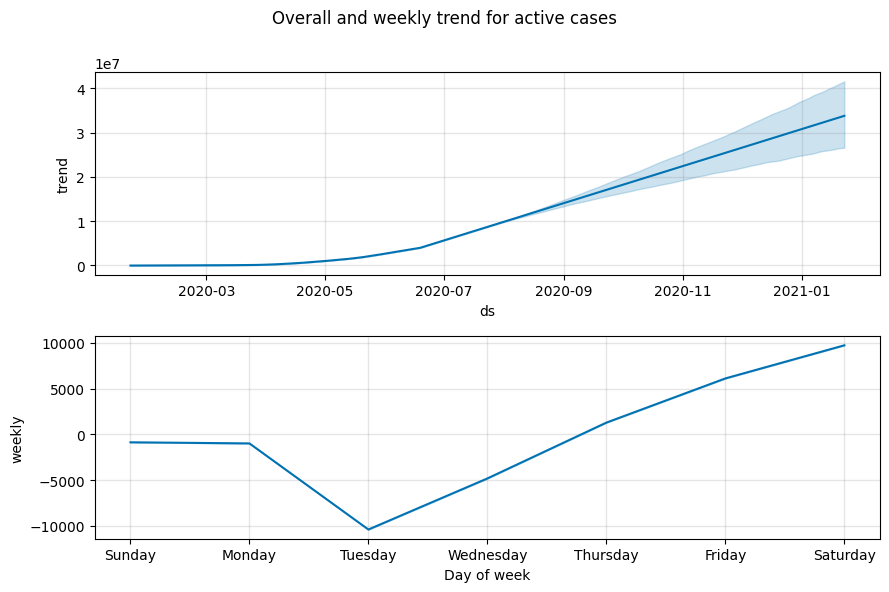

In [87]:
#ploting overall and weekly trends for recovered cases
recover_components = model_recovercase.plot_components(forecast_recovercase)
plt.suptitle('Overall and weekly trend for active cases')
plt.subplots_adjust(hspace=5)
plt.tight_layout(rect=[0, 0, 1, 0.98])
plt.show()

##### A weekly trend analysis shows no change on Monday followed by a dip in numbers till Tuesday and then an increase.

#### For death cases

In [88]:
train,test = train_test(death, 150)

In [89]:
series_fit(death, train, test)

00:03:58 - cmdstanpy - INFO - Chain [1] start processing
00:03:58 - cmdstanpy - INFO - Chain [1] done processing


Prophet model prediction generated


RMSE value of Prophet --> 17800.735521809434


In [90]:
#creating and fitting model for death cases. Forecasting for next 180 days
model_deathcase = Prophet(interval_width = 0.95)
death.columns = ['ds','y']
model_deathcase.fit(death)
forecast_deathcase = model_deathcase.predict(future)
forecast_deathcase

00:04:00 - cmdstanpy - INFO - Chain [1] start processing
00:04:00 - cmdstanpy - INFO - Chain [1] done processing


ds         trend     yhat_lower    yhat_upper    trend_lower  \
0   2020-01-22 -5.211895e+02   -3539.252163  2.338828e+03    -521.189516   
1   2020-01-23 -4.323805e+02   -3030.155906  2.855601e+03    -432.380521   
2   2020-01-24 -3.435715e+02   -2568.296138  3.658725e+03    -343.571525   
3   2020-01-25 -2.547625e+02   -2550.546260  3.451515e+03    -254.762530   
4   2020-01-26 -1.659535e+02   -3405.225437  2.538839e+03    -165.953535   
..         ...           ...            ...           ...            ...   
363 2021-01-19  1.533531e+06  951688.360230  2.126276e+06  949733.983954   
364 2021-01-20  1.538562e+06  950907.024237  2.136533e+06  949488.223930   
365 2021-01-21  1.543593e+06  952722.012393  2.146209e+06  949242.463907   
366 2021-01-22  1.548624e+06  949828.593506  2.155720e+06  948996.703883   
367 2021-01-23  1.553655e+06  950682.931474  2.166929e+06  948758.141724   

      trend_upper  additive_terms  additive_terms_lower  additive_terms_upper  \
0   -5.211895e+02     -190.974691           -190.974691           -190.974691   
1   -4.323805e+02      388.522904            388.522904            388.522904   
2   -3.435715e+02      874.307070            874.307070            874.307070   
3   -2.547625e+02      726.450908            726.450908            726.450908   
4   -1.659535e+02     -165.744835           -165.744835           -165.744835   
..            ...             ...                   ...                   ...   
363  2.124334e+06     -727.670650           -727.670650           -727.670650   
364  2.134751e+06     -190.974691           -190.974691           -190.974691   
365  2.145256e+06      388.522904            388.522904            388.522904   
366  2.156189e+06      874.307070            874.307070            874.307070   
367  2.167550e+06      726.450908            726.450908            726.450908   

         weekly  weekly_lower  weekly_upper  multiplicative_terms  \
0   -190.974691   -190.974691   -190.974691                   0.0   
1    388.522904    388.522904    388.522904                   0.0   
2    874.307070    874.307070    874.307070                   0.0   
3    726.450908    726.450908    726.450908                   0.0   
4   -165.744835   -165.744835   -165.744835                   0.0   
..          ...           ...           ...                   ...   
363 -727.670650   -727.670650   -727.670650                   0.0   
364 -190.974691   -190.974691   -190.974691                   0.0   
365  388.522904    388.522904    388.522904                   0.0   
366  874.307070    874.307070    874.307070                   0.0   
367  726.450908    726.450908    726.450908                   0.0   

     multiplicative_terms_lower  multiplicative_terms_upper          yhat  
0                           0.0                         0.0 -7.121642e+02  
1                           0.0                         0.0 -4.385762e+01  
2                           0.0                         0.0  5.307355e+02  
3                           0.0                         0.0  4.716884e+02  
4                           0.0                         0.0 -3.316984e+02  
..                          ...                         ...           ...  
363                         0.0                         0.0  1.532803e+06  
364                         0.0                         0.0  1.538371e+06  
365                         0.0                         0.0  1.543982e+06  
366                         0.0                         0.0  1.549499e+06  
367                         0.0                         0.0  1.554382e+06  

[368 rows x 16 columns]

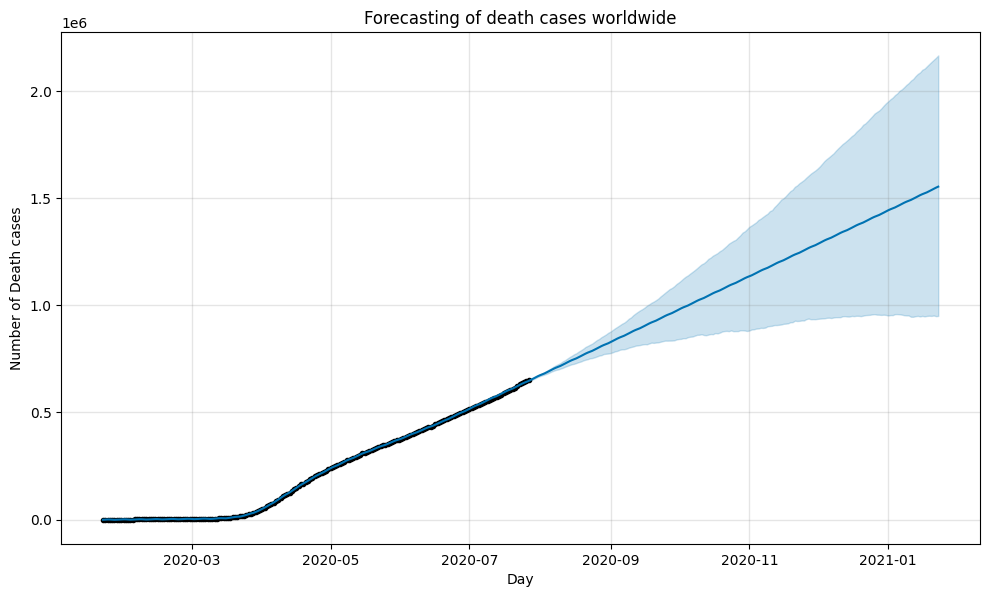

In [91]:
#  ploting forecast for death cases
death_plot = model_deathcase.plot(forecast_deathcase)
plt.xlabel("Day")
plt.ylabel('Number of Death cases')
plt.title('Forecasting of death cases worldwide')
plt.show()

##### There is an increase in confirmed cases for the next 180 days.

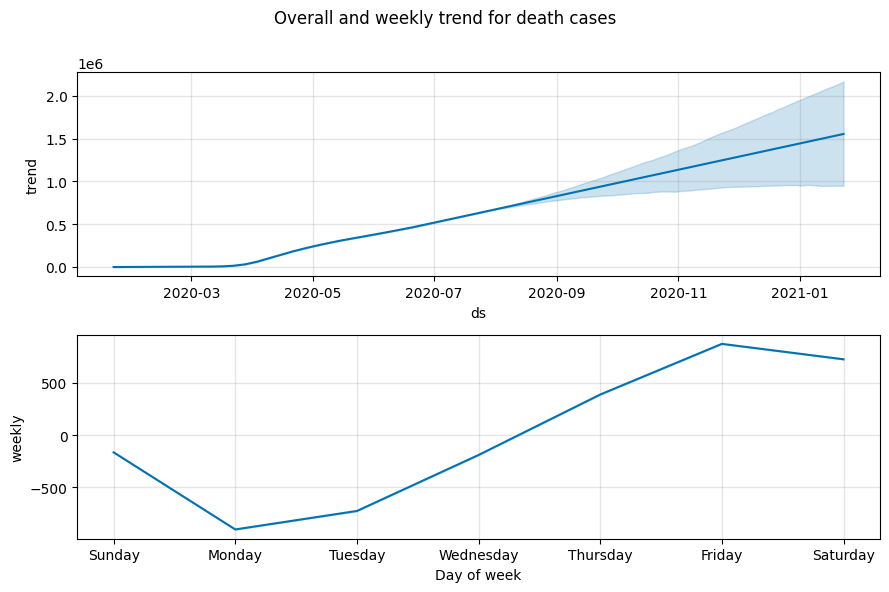

In [92]:
#ploting overall and weekly components for death cases
death_plot_components = model_deathcase.plot_components(forecast_deathcase)
plt.suptitle('Overall and weekly trend for death cases')
plt.subplots_adjust(hspace=5)
plt.tight_layout(rect=[0, 0, 1, 0.98])
plt.show()

##### A weekly trend analysis shows a dip on Monday followed by an increase till Friday and then a small dip.

#### For recovered to death ratio

In [93]:
recovered_death_ratio.shape

(188, 2)

In [94]:
train,test = train_test(recovered_death_ratio, 150)

00:04:01 - cmdstanpy - INFO - Chain [1] start processing
00:04:01 - cmdstanpy - INFO - Chain [1] done processing


Prophet model prediction generated


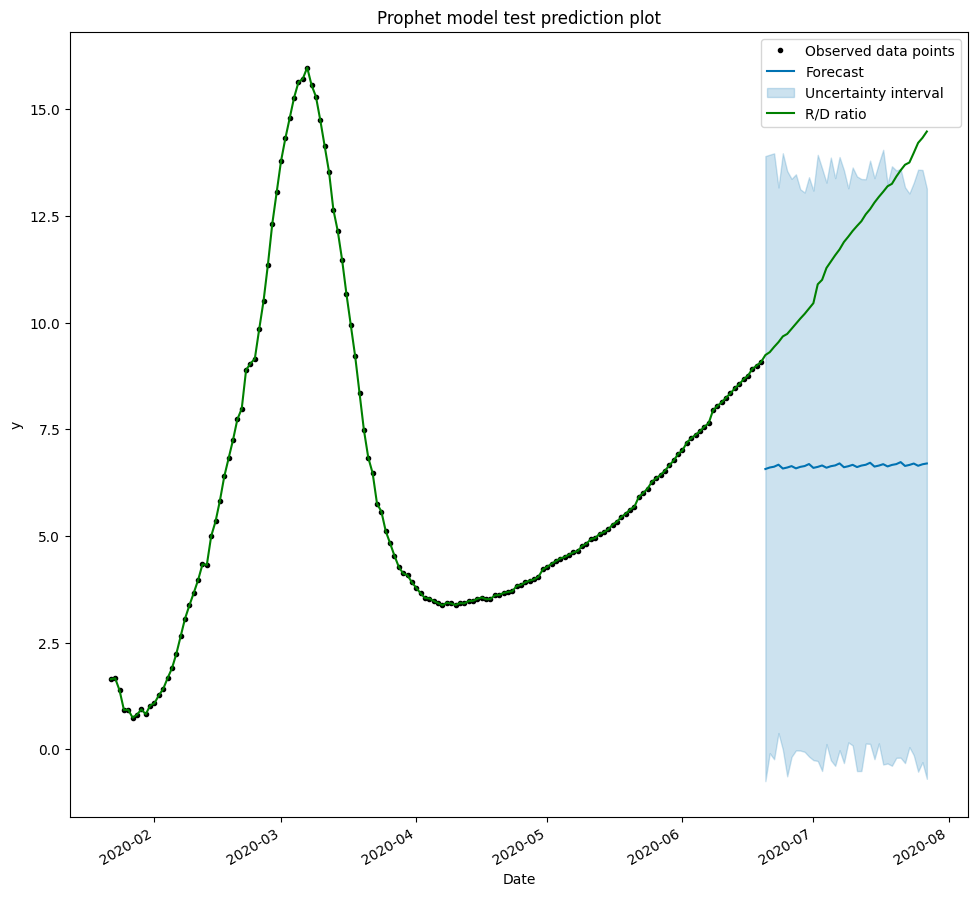

RMSE value of Prophet --> 5.389110857587063


In [95]:
series_fit(recovered_death_ratio, train, test)

In [96]:
# Converting column name and data type to fit model
recovered_death_ratio.columns = ['ds','y']
recovered_death_ratio['ds'] = pd.to_datetime(recovered_death_ratio['ds'])
recovered_death_ratio

ds          y
0   2020-01-22   1.647059
1   2020-01-23   1.666667
2   2020-01-24   1.384615
3   2020-01-25   0.928571
4   2020-01-26   0.928571
..         ...        ...
183 2020-07-23  13.750413
184 2020-07-24  13.975932
185 2020-07-25  14.210243
186 2020-07-26  14.328034
187 2020-07-27  14.476400

[188 rows x 2 columns]

In [97]:
#creating and fitting the model for RD ratio.
model_RDratio = Prophet(interval_width = 0.95)
model_RDratio.fit(recovered_death_ratio)

00:04:02 - cmdstanpy - INFO - Chain [1] start processing
00:04:02 - cmdstanpy - INFO - Chain [1] done processing


In [98]:
# Forecasting the ratio for next 360 days
future_RD = model_RDratio.make_future_dataframe(periods=360,freq='D')
forecast_RDratio = model_RDratio.predict(future_RD)
forecast_RDratio

ds      trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0   2020-01-22   4.307082   -2.102000   11.164536     4.307082     4.307082   
1   2020-01-23   4.343381   -2.788835   11.249747     4.343381     4.343381   
2   2020-01-24   4.379680   -2.397641   10.841615     4.379680     4.379680   
3   2020-01-25   4.415979   -2.292835   11.818484     4.415979     4.415979   
4   2020-01-26   4.452278   -2.238711   10.854497     4.452278     4.452278   
..         ...        ...         ...         ...          ...          ...   
543 2021-07-18  31.552769   20.638661   42.385636    23.556948    39.411156   
544 2021-07-19  31.609220   20.934282   42.097244    23.590185    39.502972   
545 2021-07-20  31.665670   20.302113   42.536159    23.623521    39.594787   
546 2021-07-21  31.722121   20.997194   41.636645    23.656964    39.686602   
547 2021-07-22  31.778572   20.124346   41.797392    23.690406    39.778418   

     additive_terms  additive_terms_lower  additive_terms_upper    weekly  \
0         -0.070981             -0.070981             -0.070981 -0.070981   
1         -0.050857             -0.050857             -0.050857 -0.050857   
2         -0.027121             -0.027121             -0.027121 -0.027121   
3          0.033829              0.033829              0.033829  0.033829   
4          0.053584              0.053584              0.053584  0.053584   
..              ...                   ...                   ...       ...   
543        0.053584              0.053584              0.053584  0.053584   
544        0.069972              0.069972              0.069972  0.069972   
545       -0.008426             -0.008426             -0.008426 -0.008426   
546       -0.070981             -0.070981             -0.070981 -0.070981   
547       -0.050857             -0.050857             -0.050857 -0.050857   

     weekly_lower  weekly_upper  multiplicative_terms  \
0       -0.070981     -0.070981                   0.0   
1       -0.050857     -0.050857                   0.0   
2       -0.027121     -0.027121                   0.0   
3        0.033829      0.033829                   0.0   
4        0.053584      0.053584                   0.0   
..            ...           ...                   ...   
543      0.053584      0.053584                   0.0   
544      0.069972      0.069972                   0.0   
545     -0.008426     -0.008426                   0.0   
546     -0.070981     -0.070981                   0.0   
547     -0.050857     -0.050857                   0.0   

     multiplicative_terms_lower  multiplicative_terms_upper       yhat  
0                           0.0                         0.0   4.236102  
1                           0.0                         0.0   4.292524  
2                           0.0                         0.0   4.352560  
3                           0.0                         0.0   4.449809  
4                           0.0                         0.0   4.505862  
..                          ...                         ...        ...  
543                         0.0                         0.0  31.606352  
544                         0.0                         0.0  31.679191  
545                         0.0                         0.0  31.657244  
546                         0.0                         0.0  31.651141  
547                         0.0                         0.0  31.727715  

[548 rows x 16 columns]

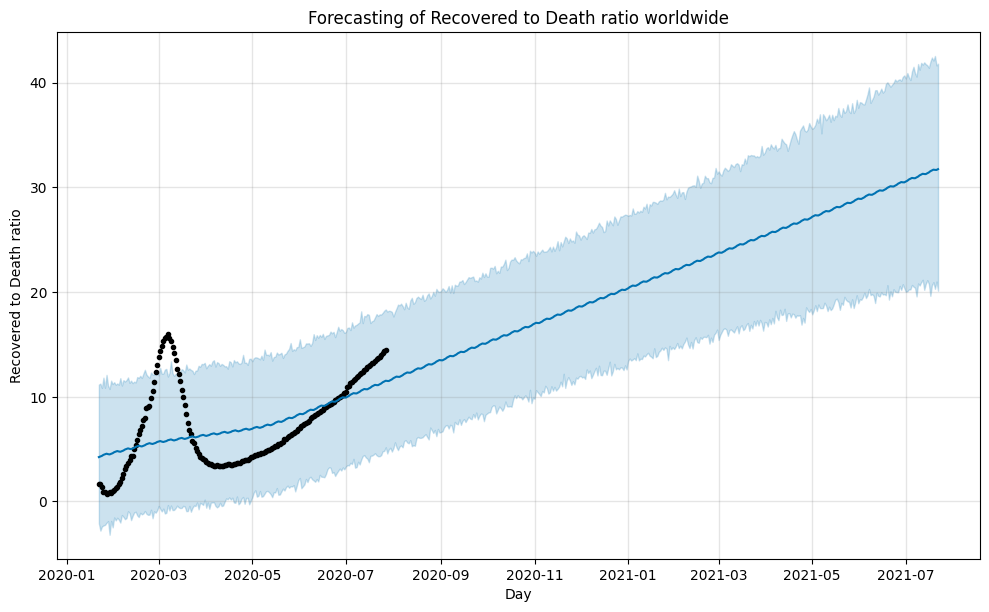

In [99]:
# Ploting the forecast for RD ratio
RDratio_plot = model_RDratio.plot(forecast_RDratio)
plt.xlabel("Day")
plt.ylabel('Recovered to Death ratio')
plt.title('Forecasting of Recovered to Death ratio worldwide')
plt.show()

In [100]:
#Ploting overall and weekly trend for RD ratio
RDratio_plot_components = model_RDratio.plot_components(forecast_RDratio)
plt.suptitle('Overall and weekly trend for RD ratio')
plt.subplots_adjust(hspace=5)
plt.tight_layout(rect=[0, 0, 1, 0.98])
plt.show()